# This is the Sinapse group's notebook - ***Data Exploration*** - predictive model about PowerCo's churn.

## Here:

- Identification of numerical and categorical columns (0.5)
- Column descriptive statistics (1.5)
- At least 3 graphs to visualize the relationship between variables chosen by the group (1)
- Clarity in the text and in the integration between the text and the code in Colab of their respective implementations (1)

# Settings

The initial segment of this Colab programming notebook is dedicated to defining the essential initial configurations for the project in question. In this section, crucial imports of resources necessary for efficiently viewing and starting the project are performed. By laying the groundwork through these settings, the notebook environment is prepared for the exploration and continued development of the programming activities to follow.

In [ ]:
!pip install --upgrade scikit-learn
# Pycaret library installation
!pip install pycaret

In [ ]:
# Import of libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta
from os import replace
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Importation of necessary documents, such as database from google drive
!gdown 1TLD79damXSqYHkUUMU754HUmKkYnK1jG

!gdown 1Nza3vUOL7WalKPG32BVQrso7J_Oeqj6x

!gdown 18B3pWhLVitH8H7Vaq88py19aaT2TqSeZ

Downloading...
From: https://drive.google.com/uc?id=1TLD79damXSqYHkUUMU754HUmKkYnK1jG
To: /content/base_clientes.csv
100% 5.25M/5.25M [00:00<00:00, 132MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Nza3vUOL7WalKPG32BVQrso7J_Oeqj6x
To: /content/base_hist_churn.csv
100% 563k/563k [00:00<00:00, 61.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=18B3pWhLVitH8H7Vaq88py19aaT2TqSeZ
To: /content/base_precos.csv
100% 22.6M/22.6M [00:00<00:00, 150MB/s]


In [ ]:
# Important and defining the customers dataframe
data_costumers = pd.read_csv('/content/base_clientes.csv')

data_prices = pd.read_csv('/content/base_precos.csv')

data_churns = pd.read_csv('/content/base_hist_churn.csv', ',')

# Initial analysis - general information about customers:

The "Initial analysis - general information about the database" section of this Colab programming notebook sets the stage for a comprehensive understanding of the project's database. This segment builds upon the foundational configurations established earlier, which involved critical imports and resource allocations to streamline the project's initiation. By delving into this section, the notebook environment is primed to delve into the intricacies of the database, facilitating a structured exploration and the subsequent progression of programming tasks. This phase is integral to the overall development process, as it provides the necessary context and insights required to make informed decisions and drive the project forward effectively.

In [ ]:
# general customer information
# here in this cell we can have a general data analysis, being able to identify categorical and numerical data.
# all columns with 'Object' in their dtype are categorical bias
# all columns with 'float64, int64' in their dtype are numeric bias.
data_costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [ ]:
# here in this command we are analyzing in each column how many null cells there are in each column
data_costumers.isnull().sum()

id                              0
activity_new                11899
campaign_disc_ele           20120
channel_sales                5274
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            15735
date_modif_prod               202
date_renewal                   44
forecast_base_bill_ele      15735
forecast_base_bill_year     15735
forecast_bill_12m           15735
forecast_cons               15735
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      150
forecast_meter_rent_12m         0
forecast_price_energy_p1      150
forecast_price_energy_p2      150
forecast_price_pow_p1         150
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           15
margin_net_pow_ele             15
nb_prod_act                     0
net_margin                     18
num_years_anti

In [ ]:
# The 'info()' method provides valuable information about the dataset's structure
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


In [ ]:
# here in this command we are analyzing in each column how many null cells there are in each column
data_prices.isnull().sum()

id                 0
price_date         0
price_p1_var    1661
price_p2_var    1661
price_p3_var    1661
price_p1_fix    1661
price_p2_fix    1661
price_p3_fix    1661
dtype: int64

In [ ]:
# The 'info()' method provides valuable information about the dataset's structure
data_churns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [ ]:
# here in this command we are analyzing in each column how many null cells there are in each column
data_churns.isnull().sum()

id       0
churn    0
dtype: int64

# Modifications and treatments

Drawing inspiration from the preceding sections where foundational groundwork was established, this phase is dedicated to implementing a series of strategic modifications and treatments to the data. These alterations are meticulously designed to cleanse, preprocess, and shape the dataset, ensuring its readiness for subsequent stages of analysis and modeling. By focusing on these crucial adjustments, the notebook not only exemplifies a systematic approach to data preparation but also underscores the significance of data quality in the broader context of the project's objectives. Through this pivotal segment, the notebook paves the way for insightful analyses and meaningful outcomes.

## Converting to boolean value

In [ ]:
# The purpose of this cell is to replace the bool values of the 'Has_gas' column for numeric values.
# 0 for false and 1 for true
data_costumers['has_gas'] = data_costumers['has_gas'].replace( {'f':0, 't':1} )
data_costumers.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,0,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,NaN,...,44.311378,0,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,NaN,...,44.311378,0,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


# Analysis on each column

With the foundational steps firmly in place, this segment undertakes an in-depth examination of each individual column within the dataset. By subjecting the columns to meticulous scrutiny, encompassing statistical measures, data visualization, and domain-specific insights, the notebook aims to extract valuable information and patterns. This analytical phase not only fosters a profound comprehension of the data's characteristics but also lays the groundwork for informed decision-making in subsequent stages. Through this systematic approach to column analysis, the notebook sets the stage for more refined feature selection, hypothesis generation, and ultimately, the development of robust models or solutions.

In [ ]:
# Defining df_clients with paronized values
data_costumers

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,0,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,NaN,...,44.311378,0,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,NaN,...,44.311378,0,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24/05/2018,08/05/2022,NaN,...,44.311378,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
20116,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27/08/2018,27/08/2022,27/08/2018,...,58.995952,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
20117,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08/02/2018,07/02/2022,NaN,...,40.606701,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
20118,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30/08/2018,30/08/2022,NaN,...,44.311378,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


### activity_new

In [ ]:
# Column for 'who hired the service' category - coded words - 8,221 filled out of 20119 = 40% filled
# This column changed from categorical to numeric data
# Function to change strings (objects) to numbers, so that the machine can better understand it when making the prediction
label_encoder1 = LabelEncoder()
data_costumers['activity_new'] = label_encoder1.fit_transform(data_costumers['activity_new'])
# The function padded values that were null with 0 instead

In [ ]:
# Here in this command, we are analyzing the "activity_new" column of the DataFrame.
data_costumers['activity_new'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: activity_new
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Here in this command, we are extracting the unique values from the "activity_new" column of the DataFrame.
data_costumers['activity_new'].unique()

array([ 53, 444,  18, 353,  55, 100, 129, 234, 262, 248,   1, 337, 420,
        70,  25,  67,  87, 212, 344, 415, 270, 281, 333, 295, 165,  34,
       231,  74, 171, 362, 299, 106,  24, 298, 407, 188, 139, 121, 352,
        84, 148, 154, 401, 330, 107, 102, 426, 173, 398, 360,  63, 268,
       151, 311, 438,  42, 147, 227,  46,   8, 376, 322, 155, 442, 279,
       351, 256,  79, 423, 245, 410, 275, 277, 334, 368,  83, 443, 179,
       242, 221, 282, 142,  90, 315,  31, 214, 118, 127,  52, 400,   6,
         4,  28,  68, 350, 370, 329, 204, 206, 223, 384, 186, 389, 159,
        98, 185,  91, 341, 285, 432, 349,  54, 264, 109, 263, 135, 150,
       332, 416, 321, 310, 160, 291, 397, 259, 345,  49, 249,  30,  20,
       364, 293,  73, 316, 210,   2, 283, 240, 335, 233, 339, 170, 178,
       357,  13, 152, 318, 253,  59,  56, 273, 254, 284, 327,  50, 101,
       213, 354, 419, 382, 244, 358,  12, 342, 260, 289, 380, 347, 119,
       421,  78, 424, 207, 365, 128, 346,  33, 422,  94, 196, 41

In [ ]:
# When changing the standardization of the data, we take the descriptive statistics out of the column, but we don't see usability for that column.
data_costumers['activity_new'].describe()

count    20120.000000
mean       328.361133
std        163.086583
min          0.000000
25%        207.000000
50%        444.000000
75%        444.000000
max        444.000000
Name: activity_new, dtype: float64

### campaign_disc_ele

note: this column is empty

In [ ]:
# Electricity campaign code' column - 0% populated
data_costumers['campaign_disc_ele'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: campaign_disc_ele
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Here in this command, we are extracting the unique values from the "campaign_disc_ele" column of the DataFrame.
data_costumers['campaign_disc_ele'].unique()

array([nan])

In [ ]:
# 'Electricity campaign code' column - 0% populated
# As there was no data even filled in, we disregarded this column
data_costumers = data_costumers.drop('campaign_disc_ele', axis = 1)

### channel_sales

In [ ]:
# Column of 'where it was sold for' - has empty elements - 73% filled
# This column originally had categorical data, after its standardization it started to have numerical character data
# Function to change strings (objects) to numbers, so that the machine can better understand it when making the prediction
label_encoder2 = LabelEncoder()
data_costumers['channel_sales'] = label_encoder2.fit_transform(data_costumers['channel_sales'])
data_costumers['channel_sales'].unique()
# The function padded values that were null with 0 instead

array([3, 6, 7, 4, 1, 5, 0, 2])

In [ ]:
# Column for 'where it was sold' - has empty elements - 73% filled
data_costumers['channel_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: channel_sales
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "channel_sales" column.
data_costumers['channel_sales'].unique()

array([3, 6, 7, 4, 1, 5, 0, 2])

In [ ]:
# Although we did the descriptive analysis, we see no relationship between what this column represents and the numerical data
data_costumers['channel_sales'].describe()

count    20120.000000
mean         4.330666
std          1.903078
min          0.000000
25%          3.000000
50%          3.000000
75%          7.000000
max          7.000000
Name: channel_sales, dtype: float64

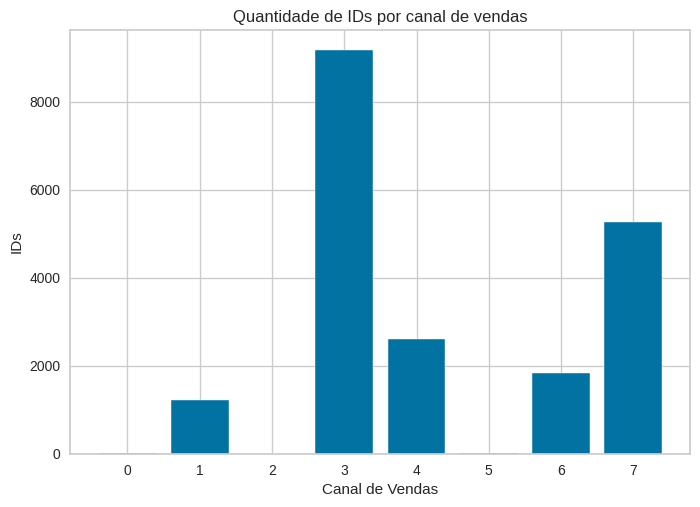

In [ ]:
# creating a bar plot to visualize the distribution of IDs across various sales channels.
grouped_data = data_costumers['channel_sales'].value_counts()
grouped_data = pd.Series(grouped_data)

plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Canal de Vendas')
plt.ylabel('IDs')
plt.title('Quantidade de IDs por canal de vendas')
plt.show()

### date_activ

Note: this column represents the contract activation dates and is **represented as a "string"**, we will have to pass the values to numeric.

In [ ]:
# 'contract activation' column - 100% populated
# Column originally had categorical data, but after its standardization it started to have numerical character data

# Function made to handle dates that do not exist, such as: 02/29/2017
def to_dt(cell):
  try:
    if pd.isnull(cell):
        return cell
    elif int(cell.split('/')[0]) == 29 and int(cell.split('/')[1]) == 2:
        return cell.replace('29/02', '28/02')
    else:
        return cell
  except:
    return cell
# Here we change the dates for more "palpable" values for the machine to analyze, sin and cos
data_costumers['date_activ'] = data_costumers['date_activ'].apply(to_dt)
data_costumers['date_activ'] = pd.to_datetime(data_costumers['date_activ'])
data_costumers['dia_do_ano'] = data_costumers['date_activ'].dt.dayofyear
data_costumers['date_activ_sin'] = np.sin(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers['dia_activ_cos'] = np.cos(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers = data_costumers.drop(['date_activ'], axis=1)
data_costumers = data_costumers.drop(['dia_do_ano'], axis=1)
data_costumers

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_end,date_first_activ,date_modif_prod,date_renewal,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,date_activ_sin,dia_activ_cos
0,ed18c9981ce183ef347246cdcc55f743,53,3,42132,0,3215,06/09/2022,NaN,27/08/2021,07/09/2021,...,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000,0.377708,-0.925925
1,9c341e73685fcff6e3527ebd51da3fe5,444,3,3537,0,563,31/12/2022,NaN,13/12/2016,01/01/2022,...,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,-0.288482,0.957485
2,97dd64b33716aadc4e22c4ab85d1c7a4,444,3,6543,0,399,04/09/2022,NaN,27/08/2021,05/09/2021,...,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321,0.988678,-0.150055
3,cf81de72ff7997ed10729751059cf7a3,18,3,186838,0,12091,03/01/2023,NaN,03/01/2017,04/01/2022,...,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951,0.858764,0.512371
4,c7c8ee9daf2a864d159d45a2373ada72,444,6,19051,0,0,07/10/2022,NaN,27/08/2021,09/10/2021,...,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150,-0.145799,-0.989314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,444,3,32270,47940,0,08/05/2022,NaN,08/05/2021,26/05/2020,...,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.615285,-0.788305
20116,d0a6f71671571ed83b2645d23af6de00,444,3,7223,0,181,27/08/2022,27/08/2018,27/08/2018,28/08/2021,...,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,-0.826354,-0.563151
20117,10e6828ddd62cbcf687cb74928c4c2d2,444,3,1844,0,179,07/02/2022,NaN,08/02/2018,09/02/2021,...,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,-0.516062,-0.856551
20118,1cf20fd6206d7678d5bcafd28c53b4db,444,3,131,0,0,30/08/2022,NaN,30/08/2018,31/08/2021,...,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,-0.854322,-0.519744


In [ ]:
# Column "date_activ" has been replaced by two columns: date_activ_sin and date_activ_cos
data_costumers['date_activ_sin'].info

<bound method Series.info of 0        0.377708
1       -0.288482
2        0.988678
3        0.858764
4       -0.145799
           ...   
20115    0.615285
20116   -0.826354
20117   -0.516062
20118   -0.854322
20119   -0.221922
Name: date_activ_sin, Length: 20120, dtype: float64>

###data_end

Note: this column represents the contract termination dates and is **represented as a "string"**, we will have to pass the values to numeric.

In [ ]:
# 'Termination of contract' column - 99.7% filled
# Column originally had categorical data, but after its standardization it started to have numerical character data

# Function made to handle dates that do not exist, such as: 02/29/2017
def to_dt(cell):
  try:
    if pd.isnull(cell):
        return cell
    elif int(cell.split('/')[0]) == 29 and int(cell.split('/')[1]) == 2:
        return cell.replace('29/02', '28/02')
    else:
        return cell
  except:
    return cell
# Here we change the dates for more "palpable" values for the machine to analyze, sin and cos
data_costumers['date_end'] = data_costumers['date_end'].apply(to_dt)
data_costumers['date_end'] = pd.to_datetime(data_costumers['date_end'])
data_costumers['dia_do_ano'] = data_costumers['date_end'].dt.dayofyear
data_costumers['date_end_sin'] = np.sin(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers['date_end_cos'] = np.cos(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers = data_costumers.drop(['date_end'], axis=1)
data_costumers = data_costumers.drop(['dia_do_ano'], axis=1)
data_costumers

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,date_activ_sin,dia_activ_cos,date_end_sin,date_end_cos
0,ed18c9981ce183ef347246cdcc55f743,53,3,42132,0,3215,NaN,27/08/2021,07/09/2021,NaN,...,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000,0.377708,-0.925925,3.777080e-01,-0.925925
1,9c341e73685fcff6e3527ebd51da3fe5,444,3,3537,0,563,NaN,13/12/2016,01/01/2022,NaN,...,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,-0.288482,0.957485,6.432491e-16,1.000000
2,97dd64b33716aadc4e22c4ab85d1c7a4,444,3,6543,0,399,NaN,27/08/2021,05/09/2021,NaN,...,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321,0.988678,-0.150055,9.911141e-01,-0.133015
3,cf81de72ff7997ed10729751059cf7a3,18,3,186838,0,12091,NaN,03/01/2017,04/01/2022,NaN,...,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951,0.858764,0.512371,8.587640e-01,0.512371
4,c7c8ee9daf2a864d159d45a2373ada72,444,6,19051,0,0,NaN,27/08/2021,09/10/2021,NaN,...,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150,-0.145799,-0.989314,-1.457992e-01,-0.989314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,444,3,32270,47940,0,NaN,08/05/2021,26/05/2020,NaN,...,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.615285,-0.788305,-5.595893e-01,-0.828770
20116,d0a6f71671571ed83b2645d23af6de00,444,3,7223,0,181,27/08/2018,27/08/2018,28/08/2021,68.64,...,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,-0.826354,-0.563151,-8.263542e-01,-0.563151
20117,10e6828ddd62cbcf687cb74928c4c2d2,444,3,1844,0,179,NaN,08/02/2018,09/02/2021,NaN,...,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,-0.516062,-0.856551,-8.606997e-03,-0.999963
20118,1cf20fd6206d7678d5bcafd28c53b4db,444,3,131,0,0,NaN,30/08/2018,31/08/2021,NaN,...,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,-0.854322,-0.519744,-8.543222e-01,-0.519744


In [ ]:
# Column "date_end" has been replaced by columns: date_end_sin and date_end_cos
data_costumers['date_end_sin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: date_end_sin
Non-Null Count  Dtype  
--------------  -----  
20118 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# To treat null values as not null, pass the following code
data_costumers['date_end_sin'] = data_costumers['date_end_sin'].fillna(0)

###date_first_activ

note:
- low fill percentage

In [ ]:
# 'Customer first contract date' column - 21% fill
# Column originally had categorical data, but after analyzing and comparing it with the 'num_years_anting' column, we realized that it would be better to remove this column ('date_first_activ' because it was under-padded - 21%)
# and use 'num_years_anting', since both represent practically the same data and it has 100% completion
data_costumers = data_costumers.drop('date_first_activ', axis = 1)

###date_modif_prod

Note: this column represents the contract termination dates and is **represented as a "string"**, we will have to pass the values to numeric.

In [ ]:
# 'Customer first contract date' column - 21% fill
# Column originally had categorical data, but after analyzing and comparing it with the 'num_years_anting' column, we realized that it would be better to remove this column ('date_first_activ' because it was under-padded - 21%)
# and use 'num_years_anting', since both practically represent the same data and it has 100% completion
def to_dt(cell):
  try:
    if pd.isnull(cell):
        return cell
    elif int(cell.split('/')[0]) == 29 and int(cell.split('/')[1]) == 2:
        return cell.replace('29/02', '28/02')
    else:
        return cell
  except:
    return cell
# Here we change the dates for more "palpable" values for the machine to analyze, sin and cos
data_costumers['date_modif_prod'] = data_costumers['date_modif_prod'].apply(to_dt)
data_costumers['date_modif_prod'] = pd.to_datetime(data_costumers['date_modif_prod'])
data_costumers['dia_do_ano'] = data_costumers['date_modif_prod'].dt.dayofyear
data_costumers['date_modif_prod_sin'] = np.sin(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers['date_modif_prod_cos'] = np.cos(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers = data_costumers.drop(['date_modif_prod'], axis=1)
data_costumers = data_costumers.drop(['dia_do_ano'], axis=1)

In [ ]:
# Column "date_modif_prod" has been replaced by two columns: date_modif_prod_sin and date_modif_prod_cos
data_costumers['date_modif_prod_sin'] = data_costumers['date_modif_prod_sin'].fillna(0)
data_costumers['date_modif_prod_cos'] = data_costumers['date_modif_prod_cos'].fillna(0)

### date_renewal

Note: this column represents the contract termination dates and is **represented as a "string"**, we will have to pass the values to numeric.

In [ ]:
# 'Contract renewal' column - 99% fill
# Column originally had categorical data, but after its standardization it started to have numerical character data

# Function made to handle dates that do not exist, such as: 02/29/2017
def to_dt(cell):
  try:
    if pd.isnull(cell):
        return cell
    elif int(cell.split('/')[0]) == 29 and int(cell.split('/')[1]) == 2:
        return cell.replace('29/02', '28/02')
    else:
        return cell
  except:
    return cell
# Here we change the dates for more "palpable" values for the machine to analyze, sin and cos
data_costumers['date_renewal'] = data_costumers['date_renewal'].apply(to_dt)
data_costumers['date_renewal'] = pd.to_datetime(data_costumers['date_renewal'])
data_costumers['dia_do_ano'] = data_costumers['date_renewal'].dt.dayofyear
data_costumers['date_renewal_sin'] = np.sin(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers['date_renewal_cos'] = np.cos(2 * np.pi * data_costumers['dia_do_ano']/365)
data_costumers = data_costumers.drop(['date_renewal'], axis=1)
data_costumers = data_costumers.drop(['dia_do_ano'], axis=1)
data_costumers

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,...,origin_up,pow_max,date_activ_sin,dia_activ_cos,date_end_sin,date_end_cos,date_modif_prod_sin,date_modif_prod_cos,date_renewal_sin,date_renewal_cos
0,ed18c9981ce183ef347246cdcc55f743,53,3,42132,0,3215,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,20.000,0.377708,-0.925925,3.777080e-01,-0.925925,-0.826354,-0.563151,-0.128748,-0.991677
1,9c341e73685fcff6e3527ebd51da3fe5,444,3,3537,0,563,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,15.000,-0.288482,0.957485,6.432491e-16,1.000000,-0.288482,0.957485,0.017213,0.999852
2,97dd64b33716aadc4e22c4ab85d1c7a4,444,3,6543,0,399,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,17.321,0.988678,-0.150055,9.911141e-01,-0.133015,-0.826354,-0.563151,0.796183,-0.605056
3,cf81de72ff7997ed10729751059cf7a3,18,3,186838,0,12091,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,11.951,0.858764,0.512371,8.587640e-01,0.512371,0.858764,0.512371,0.999991,0.004304
4,c7c8ee9daf2a864d159d45a2373ada72,444,6,19051,0,0,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,13.150,-0.145799,-0.989314,-1.457992e-01,-0.989314,-0.826354,-0.563151,-0.936881,-0.349647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,444,3,32270,47940,0,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.615285,-0.788305,-5.595893e-01,-0.828770,-0.559589,-0.828770,0.573772,-0.819015
20116,d0a6f71671571ed83b2645d23af6de00,444,3,7223,0,181,68.64,68.64,1254.65,15.94,...,lxidpiddsbxsbosboudacockeimpuepw,6.000,-0.826354,-0.563151,-8.263542e-01,-0.563151,-0.826354,-0.563151,-0.835925,-0.548843
20117,10e6828ddd62cbcf687cb74928c4c2d2,444,3,1844,0,179,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,15.935,-0.516062,-0.856551,-8.606997e-03,-0.999963,-0.516062,-0.856551,-0.880012,-0.474951
20118,1cf20fd6206d7678d5bcafd28c53b4db,444,3,131,0,0,NaN,NaN,NaN,NaN,...,lxidpiddsbxsbosboudacockeimpuepw,11.000,-0.854322,-0.519744,-8.543222e-01,-0.519744,-0.854322,-0.519744,-0.863142,-0.504961


In [ ]:
# Column "date_renewal" has been replaced by two columns: date_renewal_sin and date_renewal_cos
data_costumers['date_renewal_sin'] = data_costumers['date_renewal_sin'].fillna(0)
data_costumers['date_renewal_cos'] = data_costumers['date_renewal_cos'].fillna(0)

### forecast_base_bill_ele

- Look for correlation with other columns (imp_cons) and by linear regression fill in the missing values.

In [ ]:
# Checking the amount of zeros.
zeros = (data_costumers['forecast_base_bill_ele'] == 0).sum()
zeros

1804

In [ ]:
# Using the describe() method to generate a summary of descriptive statistics,
data_costumers['forecast_base_bill_ele'].describe()

count     4385.000000
mean       344.466267
std        724.065119
min       -364.940000
25%          0.000000
50%        162.600000
75%        398.500000
max      19021.240000
Name: forecast_base_bill_ele, dtype: float64

In [ ]:
# Checking the presence of missing values (null values) in the "forecast_base_bill_ele" column.
data_costumers['forecast_base_bill_ele'].isnull().value_counts()

True     15735
False     4385
Name: forecast_base_bill_ele, dtype: int64

In [ ]:
# Column that represents the baseline of the electricity bill expected for the next month ($) - 21% complete
# Column with numerical data
data_costumers['forecast_base_bill_ele'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_base_bill_ele
Non-Null Count  Dtype  
--------------  -----  
4385 non-null   float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# If it is decided to exclude the column 'forecast_base_bill_ele'
# df_clientes = df_clientes.drop('forecast_base_bill_ele', axis = 1)

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_base_bill_ele' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_base_bill_ele', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_base_bill_ele'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_base_bill_ele']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)
# Filling the missing 'forecast_base_bill_ele' values with the predicted values.
data_costumers['forecast_base_bill_ele'] = data_costumers['forecast_base_bill_ele'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

In [ ]:
# Filling missing values in the 'forecast_base_bill_ele' column with zeros.
data_costumers['forecast_base_bill_ele'].fillna(0)

0        512.611181
1        204.073376
2        234.593126
3        325.722237
4        334.493052
            ...    
20115    441.046701
20116     68.640000
20117    198.158956
20118    185.106907
20119    249.211152
Name: forecast_base_bill_ele, Length: 20120, dtype: float64

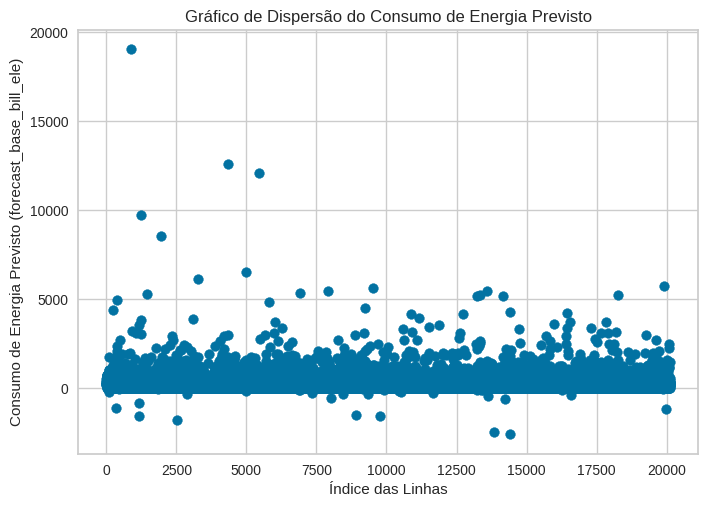

In [ ]:
# Extracting the 'forecast_base_bill_ele' column for visualization.
filtered_data = data_costumers['forecast_base_bill_ele']
# Creating a scatter plot to visualize the predicted energy consumption (forecast_base_bill_ele) data.
plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_base_bill_ele)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

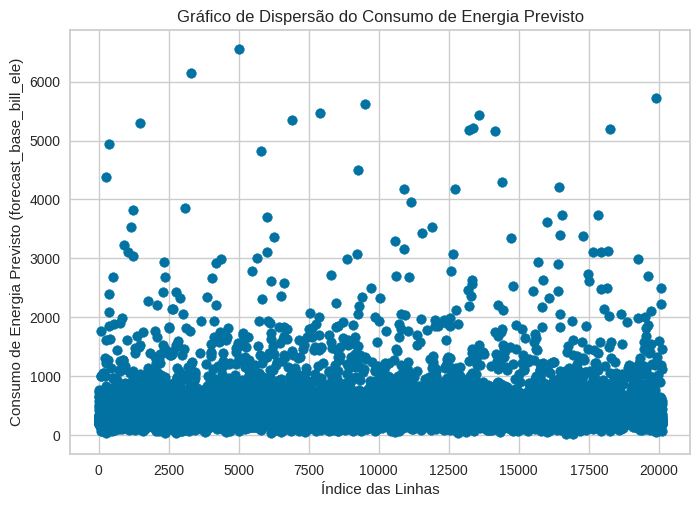

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_base_bill_ele'] < 7000) & (data_costumers['forecast_base_bill_ele'] > 0)]

plt.scatter(filtered_data.index, filtered_data['forecast_base_bill_ele'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_base_bill_ele)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_base_bill_ele' is between 0 and 7000.
filter_condition = (data_costumers['forecast_base_bill_ele'] < 7000) & (data_costumers['forecast_base_bill_ele'] > 0)
average_forecast_base_bill_ele = data_costumers['forecast_base_bill_ele'].mean()

# Using loc to assign the average value to rows where the filter condition is not met.
data_costumers.loc[~filter_condition, 'forecast_base_bill_ele'] = average_forecast_base_bill_ele

### forecast_base_bill_year

In [ ]:
# Checking the amount of zeros.
zeros = (data_costumers['forecast_base_bill_ele'] == 0).sum()
zeros

0

In [ ]:
# Column of 'expected electricity bill for the next year ($$$)' - 21% complete
# Display numerical data
data_costumers['forecast_base_bill_year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_base_bill_year
Non-Null Count  Dtype  
--------------  -----  
4385 non-null   float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics
data_costumers['forecast_base_bill_year'].isnull().value_counts()

True     15735
False     4385
Name: forecast_base_bill_year, dtype: int64

In [ ]:
# Delete column 'forecast_base_bill_year'
#df_clientes = df_clientes.drop('forecast_base_bill_year', axis = 1)

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_base_bill_year' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_base_bill_year', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_base_bill_year'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_base_bill_year']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'forecast_base_bill_year' values with the predicted values.
data_costumers['forecast_base_bill_year'] = data_costumers['forecast_base_bill_year'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

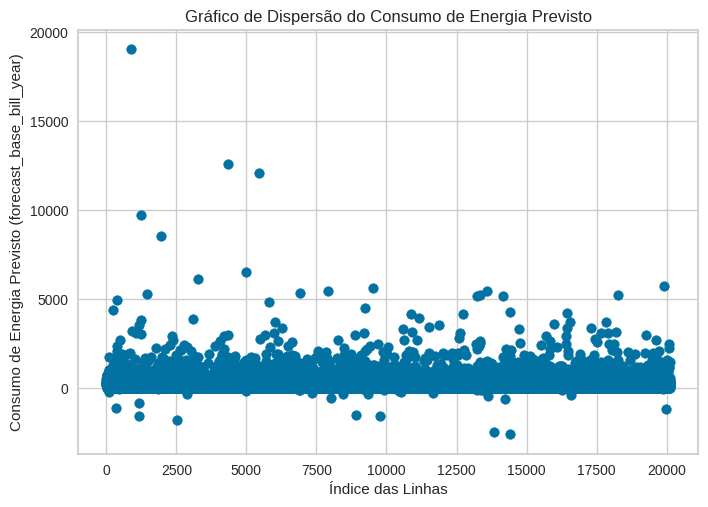

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_base_bill_year).
filtered_data = data_costumers['forecast_base_bill_year']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_base_bill_year)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

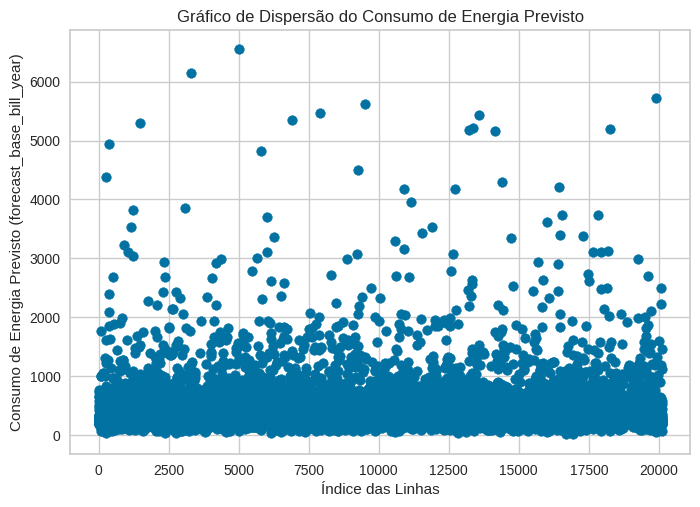

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_base_bill_year) within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_base_bill_year'] < 7000) & (data_costumers['forecast_base_bill_year'] > 0)]

plt.scatter(filtered_data.index, filtered_data['forecast_base_bill_year'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_base_bill_year)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_base_bill_year' is between 0 and 7000.
filter_condition = (data_costumers['forecast_base_bill_year'] < 7000) & (data_costumers['forecast_base_bill_year'] > 0)

average_forecast_base_bill_year = data_costumers['forecast_base_bill_year'].mean()

data_costumers.loc[~filter_condition, 'forecast_base_bill_year'] = average_forecast_base_bill_year

###forecast_bill_12m

In [ ]:
# Checking the amount of zeros.
zeros = (data_costumers['forecast_bill_12m'] == 0).sum()
zeros

75

In [ ]:
# Checking the distribution of missing values (null values) in the 'forecast_bill_12m' column.
data_costumers['forecast_bill_12m'].isnull().value_counts()

True     15735
False     4385
Name: forecast_bill_12m, dtype: int64

In [ ]:
# Column of 'expected electricity bill for the next year ($$$)' - 21% complete
# Column with numerical data
data_costumers['forecast_bill_12m'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_bill_12m
Non-Null Count  Dtype  
--------------  -----  
4385 non-null   float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_bill_12m' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_bill_12m', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_bill_12m'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_bill_12m']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'forecast_bill_12m' values with the predicted values.
data_costumers['forecast_bill_12m'] = data_costumers['forecast_bill_12m'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

In [ ]:
# Checking the distribution of missing values (null values) in the 'forecast_bill_12m' column.
data_costumers['forecast_bill_12m'].isnull().value_counts()

False    20103
True        17
Name: forecast_bill_12m, dtype: int64

In [ ]:
# Column descriptive statistics
data_costumers['forecast_bill_12m'].describe()

count    20103.000000
mean      3750.984932
std       3337.130265
min     -29190.726084
25%       2381.138626
50%       2909.180000
75%       4187.027899
max      81122.630000
Name: forecast_bill_12m, dtype: float64

In [ ]:
# Delete column 'forecast_bill_12m'
# df_clientes = df_clientes.drop('forecast_bill_12m', axis = 1)

In [ ]:
# Filling missing values in the 'forecast_bill_12m' column with zeros.
data_costumers['forecast_bill_12m'].fillna(0)

0        5795.345748
1        2331.851084
2        2674.450889
3        3697.421768
4        3795.878660
            ...     
20115    4991.997867
20116    1254.650000
20117    2265.458697
20118    2118.942770
20119    2838.545709
Name: forecast_bill_12m, Length: 20120, dtype: float64

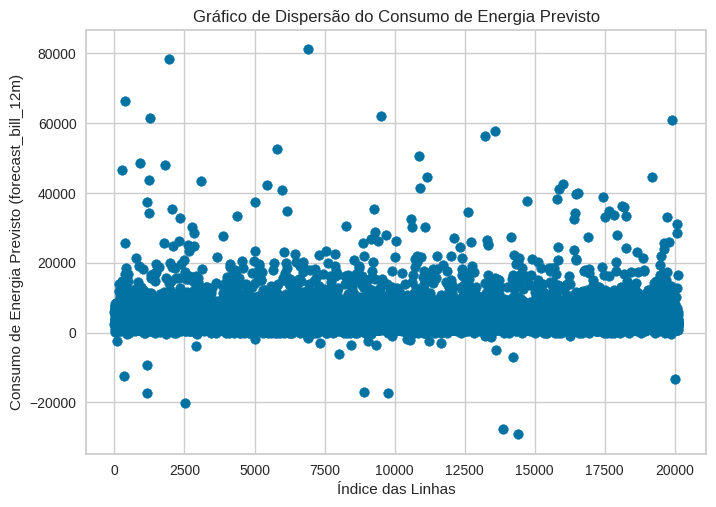

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_bill_12m).
filtered_data = data_costumers['forecast_bill_12m']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_bill_12m)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

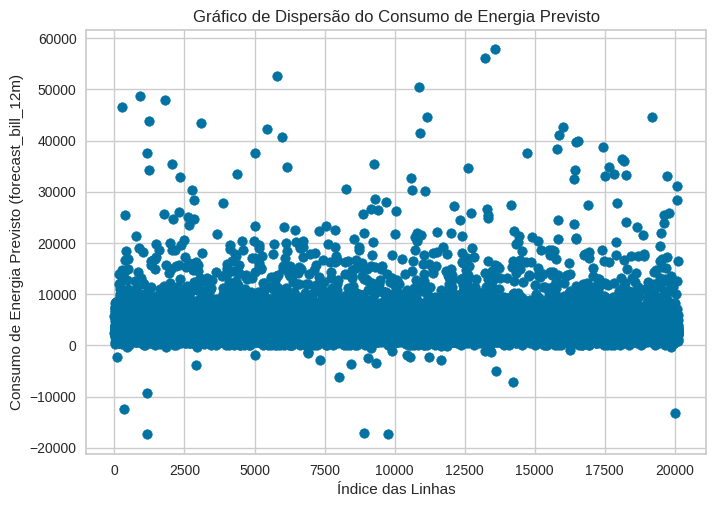

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_bill_12m) within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_bill_12m'] < 60000) & (data_costumers['forecast_bill_12m'] > -18000)]

plt.scatter(filtered_data.index, filtered_data['forecast_bill_12m'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_bill_12m)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_bill_12m' is between 0 and 7000.
filter_condition = (data_costumers['forecast_bill_12m'] < 7000) & (data_costumers['forecast_bill_12m'] > 0)

average_forecast_bill_12m = data_costumers['forecast_bill_12m'].mean()

data_costumers.loc[~filter_condition, 'forecast_bill_12m'] = average_forecast_bill_12m

###forecast_cons

In [ ]:
# Checking the amount of zeros.
zeros = (data_costumers['forecast_cons'] == 0).sum()
zeros

1902

In [ ]:
# 'Electricity consumption for next month' column - 21% fill
# Column with numerical data
data_costumers['forecast_cons'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_cons
Non-Null Count  Dtype  
--------------  -----  
4385 non-null   float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics
data_costumers['forecast_cons'].describe()

count     4385.000000
mean       214.150812
std        542.506310
min         -2.090000
25%          0.000000
50%         40.830000
75%        228.660000
max      18267.500000
Name: forecast_cons, dtype: float64

In [ ]:
# Checking the distribution of missing values (null values) in the 'forecast_cons' column.
data_costumers['forecast_cons'].isnull().value_counts()

True     15735
False     4385
Name: forecast_cons, dtype: int64

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_cons' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_cons', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_cons'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_cons']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Creating a training dataset by dropping rows with missing values in 'forecast_cons' and 'net_margin' columns.
data_costumers['forecast_cons'] = data_costumers['forecast_cons'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

In [ ]:
# Filling missing values in the 'forecast_cons' column with zeros.
data_costumers['forecast_cons'].fillna(0)

0        337.570121
1        111.085442
2        133.488712
3        200.382775
4        206.821064
            ...    
20115    285.037634
20116     15.940000
20117    106.743914
20118     97.162951
20119    144.219193
Name: forecast_cons, Length: 20120, dtype: float64

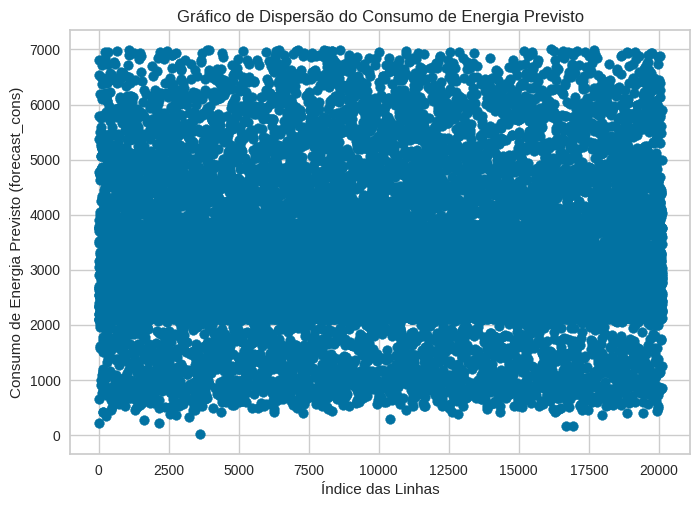

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_bill_12m).
filtered_data = data_costumers['forecast_bill_12m']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_cons)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

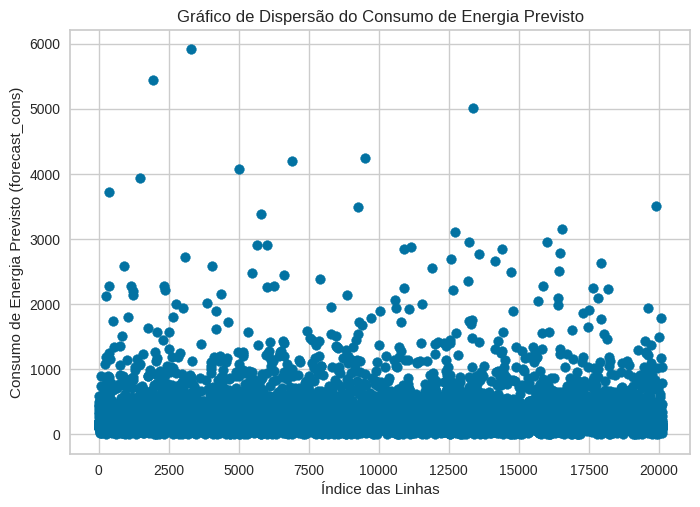

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_bill) within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_cons'] < 6000) & (data_costumers['forecast_cons'] > 0)]

plt.scatter(filtered_data.index, filtered_data['forecast_cons'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_cons)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_bill' is between 0 and 6000.
filter_condition = (data_costumers['forecast_cons'] < 6000) & (data_costumers['forecast_cons'] > 0)

average_forecast_cons = data_costumers['forecast_cons'].mean()

data_costumers.loc[~filter_condition, 'forecast_cons'] = average_forecast_cons

In [ ]:
# Delete column 'forecast_cons'
# df_clientes = df_clientes.drop('forecast_cons', axis = 1)

###forecast_cons_12m

In [ ]:
# Column for 'electricity consumption for the next year (kWh)' - 100% filled
# Column with numeric data
data_costumers['forecast_cons_12m'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_cons_12m
Non-Null Count  Dtype  
--------------  -----  
20120 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics
data_costumers['forecast_cons_12m'].describe()

count     20120.000000
mean       2370.826669
std        4047.481373
min      -16689.260000
25%         509.840000
50%        1176.745000
75%        2700.552500
max      103801.930000
Name: forecast_cons_12m, dtype: float64

In [ ]:
# Checking the distribution of missing values (null values) in the 'forecast_cons_12m' column.
data_costumers['forecast_cons_12m'].isnull().value_counts()

False    20120
Name: forecast_cons_12m, dtype: int64

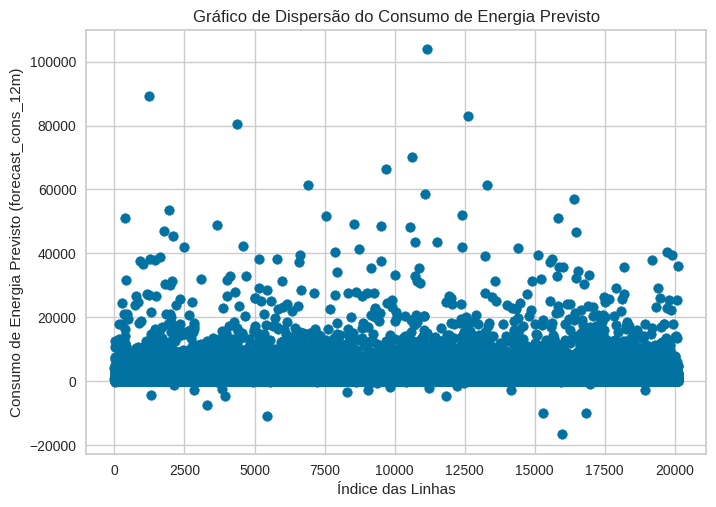

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_cons_12m).
filtered_data = data_costumers['forecast_cons_12m']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_cons_12m)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

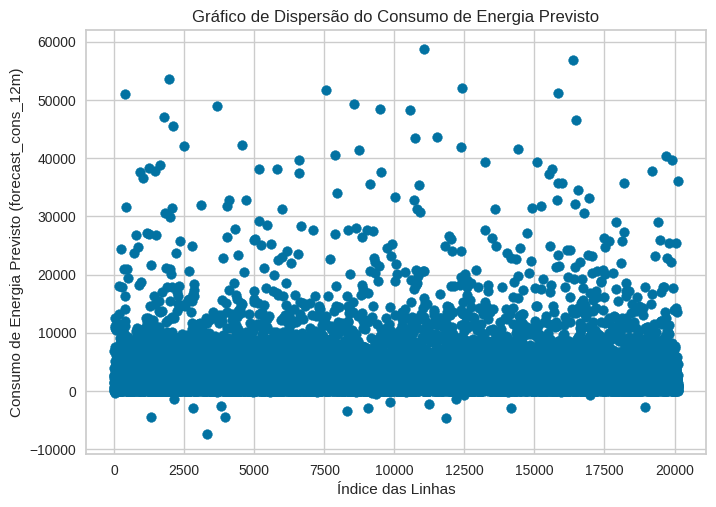

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_cons_12m) within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_cons_12m'] < 60000) & (data_costumers['forecast_cons_12m'] > -10000)]

plt.scatter(filtered_data.index, filtered_data['forecast_cons_12m'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_cons_12m)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_cons_12m' is between -10000 and 60000.
filter_condition = (data_costumers['forecast_cons_12m'] < 60000) & (data_costumers['forecast_cons_12m'] > -10000)

average_forecast_cons = data_costumers['forecast_cons_12m'].mean()

data_costumers.loc[~filter_condition, 'forecast_cons_12m'] = average_forecast_cons

###forecast_cons_year

In [ ]:
# Column 'electricity consumption for the next year (kWh)' - 100% filled
# Column with numerical data
data_costumers['forecast_cons_year'].info()



<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_cons_year
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics
data_costumers['forecast_cons_year'].describe()


count     20120.000000
mean       1912.253529
std        5231.517730
min      -85627.000000
25%           0.000000
50%         378.500000
75%        2019.000000
max      175375.000000
Name: forecast_cons_year, dtype: float64

In [ ]:
data_costumers['forecast_cons_year'].isnull().value_counts()

False    20120
Name: forecast_cons_year, dtype: int64

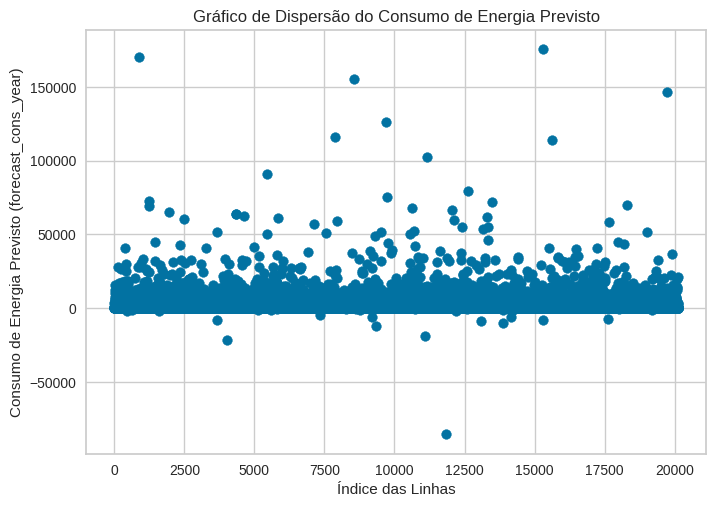

In [ ]:
filtered_data = data_costumers['forecast_cons_year']

# Create a scatter plot
plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_cons_year)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

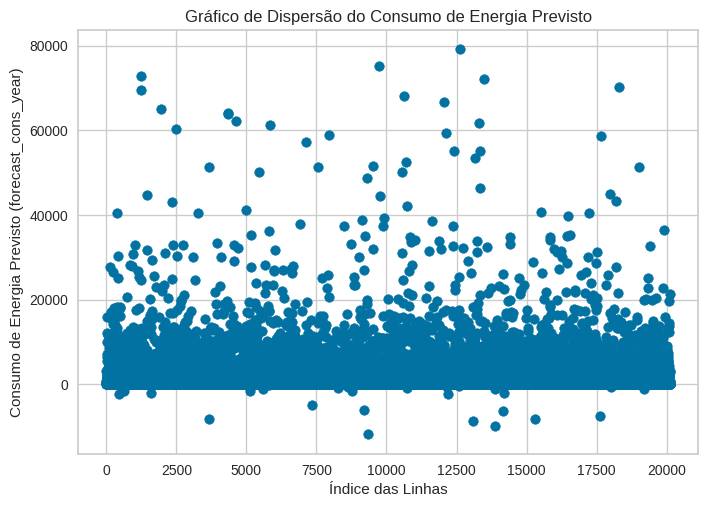

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_cons_year) within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_cons_year'] < 80000) & (data_costumers['forecast_cons_year'] > -17000)]

plt.scatter(filtered_data.index, filtered_data['forecast_cons_year'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_cons_year)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_cons_year' is between -17000 and 80000.
filter_condition = (data_costumers['forecast_cons_year'] < 80000) & (data_costumers['forecast_cons_year'] > -17000)

average_forecast_cons = data_costumers['forecast_cons_year'].mean()

data_costumers.loc[~filter_condition, 'forecast_cons_year'] = average_forecast_cons

###forecast_discount_energy

In [ ]:
# 'current probable discount' column - 99% fill
# Column with numerical data
data_costumers['forecast_discount_energy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_discount_energy
Non-Null Count  Dtype  
--------------  -----  
19970 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Here in this command, we are extracting the unique values from the "forecast_discount_energy" column of the DataFrame.
data_costumers['forecast_discount_energy'].unique()

array([ 0., 24., 30., nan, 50., 28., 25., 22., 26., 19., 10.,  5., 17.,
       12., 23.])

In [ ]:
# Column descriptive statistics
data_costumers['forecast_discount_energy'].describe()

count    19970.000000
mean         1.007611
std          5.217714
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: forecast_discount_energy, dtype: float64

In [ ]:
# Checking the distribution of missing values (null values) in the 'forecast_discount_energy' column.
data_costumers['forecast_discount_energy'].isnull().value_counts()

False    19970
True       150
Name: forecast_discount_energy, dtype: int64

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_discount_energy' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_discount_energy', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_discount_energy'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_discount_energy']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'forecast_discount_energy' values with the predicted values.
data_costumers['forecast_discount_energy'] = data_costumers['forecast_discount_energy'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

In [ ]:
# Filling missing values in the 'forecast_discount_energy' column with zeros.
data_costumers['forecast_discount_energy'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20115    0.0
20116    0.0
20117    0.0
20118    0.0
20119    0.0
Name: forecast_discount_energy, Length: 20120, dtype: float64

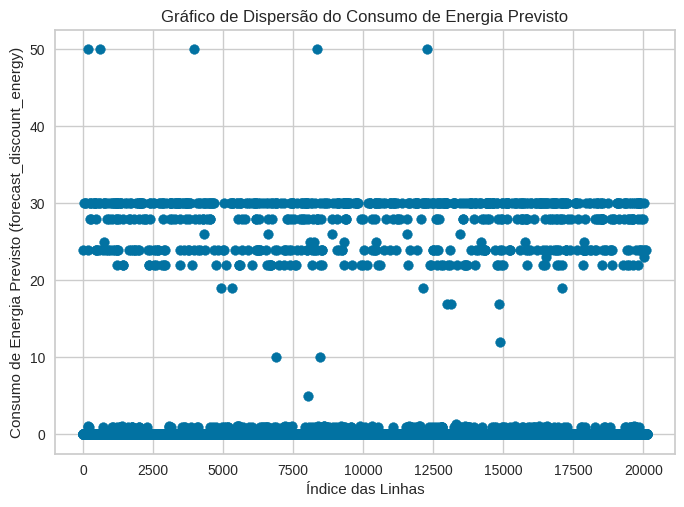

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_discount_energy).
filtered_data = data_costumers['forecast_discount_energy']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_discount_energy)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

###forecast_meter_rent_12m


In [ ]:
# Column for 'probable discount for the next 12 months' - 100% completed
# Columns with numerical data
data_costumers['forecast_meter_rent_12m'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_meter_rent_12m
Non-Null Count  Dtype  
--------------  -----  
20120 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics:
data_costumers['forecast_meter_rent_12m'].describe()

count    20120.000000
mean        70.064085
std         78.219057
min       -242.960000
25%         16.230000
50%         19.430000
75%        131.490000
max       2411.690000
Name: forecast_meter_rent_12m, dtype: float64

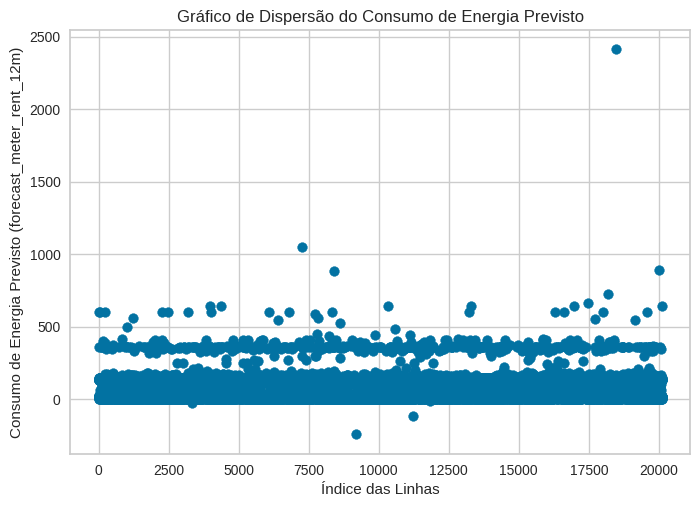

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_meter_rent_12m) within a specific range.
filtered_data = data_costumers['forecast_meter_rent_12m']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_meter_rent_12m)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

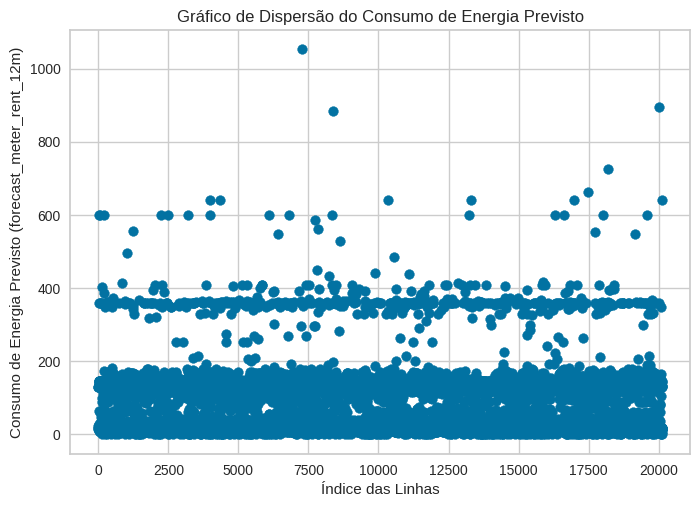

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (forecast_meter_rent_12m) within a specific range.
filtered_data = data_costumers[(data_costumers['forecast_meter_rent_12m'] < 1500) & (data_costumers['forecast_meter_rent_12m'] > 0)]

plt.scatter(filtered_data.index, filtered_data['forecast_meter_rent_12m'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_meter_rent_12m)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'forecast_meter_rent_12m' is between 0 and 1500.
filter_condition = (data_costumers['forecast_meter_rent_12m'] < 1500) & (data_costumers['forecast_meter_rent_12m'] > 0)

average_forecast_meter_rent_12m = data_costumers['forecast_meter_rent_12m'].mean()

data_costumers.loc[~filter_condition, 'forecast_meter_rent_12m'] = average_forecast_meter_rent_12m

### forecast_price_energy_p1

In [ ]:
# Column 'forecast energy price for the 1st period ($)' - 99.2% complete
# Column with numerical data
data_costumers['forecast_price_energy_p1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_price_energy_p1
Non-Null Count  Dtype  
--------------  -----  
19970 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics
data_costumers['forecast_price_energy_p1'].describe()

count    19970.000000
mean         0.135960
std          0.026286
min          0.000000
25%          0.115237
50%          0.142881
75%          0.146348
max          0.273963
Name: forecast_price_energy_p1, dtype: float64

In [ ]:
# Column descriptive statistics
data_costumers['forecast_price_energy_p1'].isnull().value_counts()

False    19970
True       150
Name: forecast_price_energy_p1, dtype: int64

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_price_energy_p1' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_price_energy_p1', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_price_energy_p1'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_price_energy_p1']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'forecast_price_energy_p1' values with the predicted values.
data_costumers['forecast_price_energy_p1'] = data_costumers['forecast_price_energy_p1'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

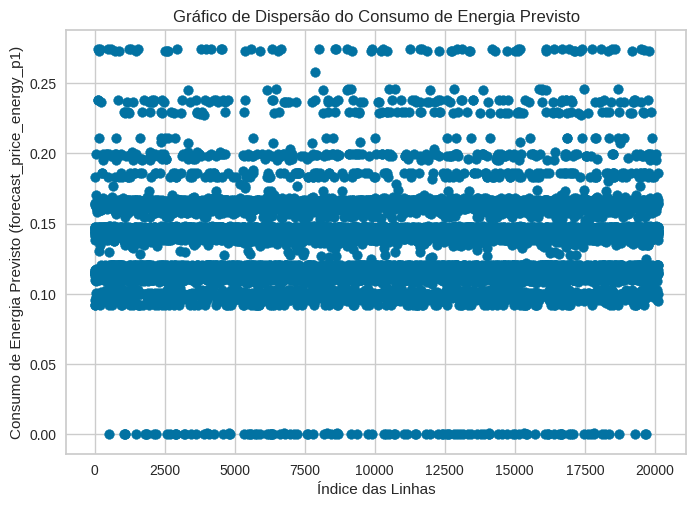

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_price_energy_p1).
filtered_data = data_costumers['forecast_price_energy_p1']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_price_energy_p1)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

### forecast_price_energy_p2

In [ ]:
# Column 'forecast energy price for the 2nd period ($)' - 99.2% complete
# Column with numerical data
data_costumers['forecast_price_energy_p2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_price_energy_p2
Non-Null Count  Dtype  
--------------  -----  
19970 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Column descriptive statistics
data_costumers['forecast_price_energy_p2'].describe()

count    19970.000000
mean         0.052889
std          0.048587
min          0.000000
25%          0.000000
50%          0.086163
75%          0.098837
max          0.195975
Name: forecast_price_energy_p2, dtype: float64

In [ ]:
# Column descriptive statistics
data_costumers['forecast_price_energy_p2'].isnull().value_counts()

False    19970
True       150
Name: forecast_price_energy_p2, dtype: int64

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_price_energy_p2' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_price_energy_p2', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_price_energy_p2'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_price_energy_p2']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'forecast_price_energy_p2' values with the predicted values.
data_costumers['forecast_price_energy_p2'] = data_costumers['forecast_price_energy_p2'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

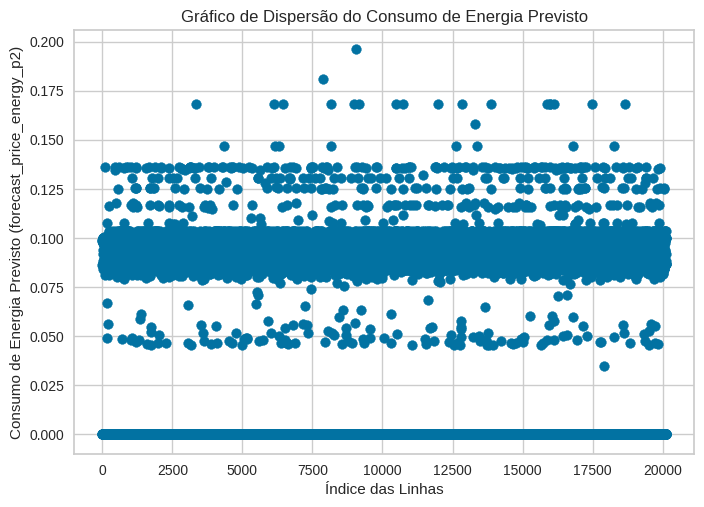

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_price_energy_p2).
filtered_data = data_costumers['forecast_price_energy_p2']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_price_energy_p2)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

### has_gas

In [ ]:
# Column for 'indicated if the customer is also a gas customer' - 99.2% completed
# Column with numerical data (after processing)
data_costumers['has_gas'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: has_gas
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "has_gas" column.
data_costumers['has_gas'].unique()

array([0, 1])

In [ ]:
# There is no need for the descriptive statistics of the column because they are "true" or "false" values

### nb_prod_act  

In [ ]:
# Column for 'number of active products and services' - 100% complete
# Column with numerical data
data_costumers['nb_prod_act'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: nb_prod_act
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "nb_prod_act" column.
data_costumers['nb_prod_act'].unique()

array([ 1,  4,  2,  3,  5, 32,  9,  8, 31,  6, 10])

In [ ]:
# Column descriptive statistics
data_costumers['nb_prod_act'].describe()

count    20120.00000
mean         1.34826
std          1.45777
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         32.00000
Name: nb_prod_act, dtype: float64

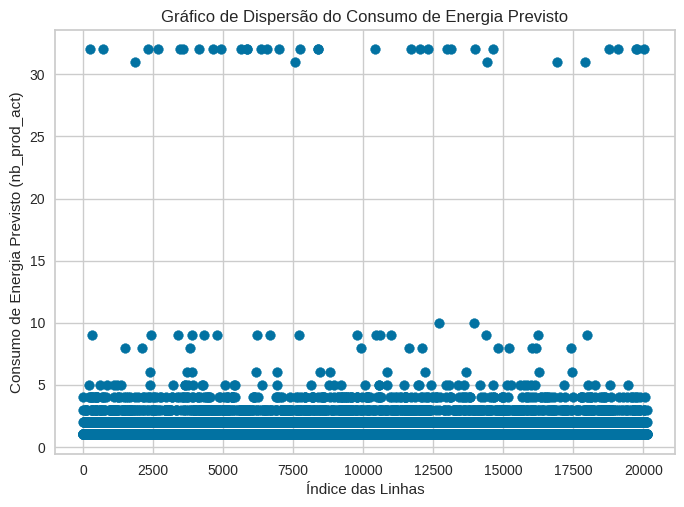

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (nb_prod_act).
filtered_data = data_costumers['nb_prod_act']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (nb_prod_act)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

### origin_up

In [ ]:
# Column of 'where it was sold for' - has empty elements - 73% filled
# This column originally had categorical data, after its standardization it started to have numerical character data
# Function to change strings (objects) to numbers, so that the machine can better understand it when making the prediction
label_encoder2 = LabelEncoder()
data_costumers['origin_up'] = label_encoder2.fit_transform(data_costumers['origin_up'])
# The function padded values that were null with 0 instead

In [ ]:
# Column for 'electricity campaign code that the customer subscribed to first' - 99.4% complete
# Column with categorical data
data_costumers['origin_up'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: origin_up
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (origin_up).
data_costumers['origin_up'].unique()

array([4, 3, 2, 6, 0, 5, 1])

In [ ]:
# Column "descriptive statistics", despite being categorical data, this command allows us to access important information.
data_costumers['origin_up'].describe()

count    20120.000000
mean         3.217793
std          0.877949
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: origin_up, dtype: float64

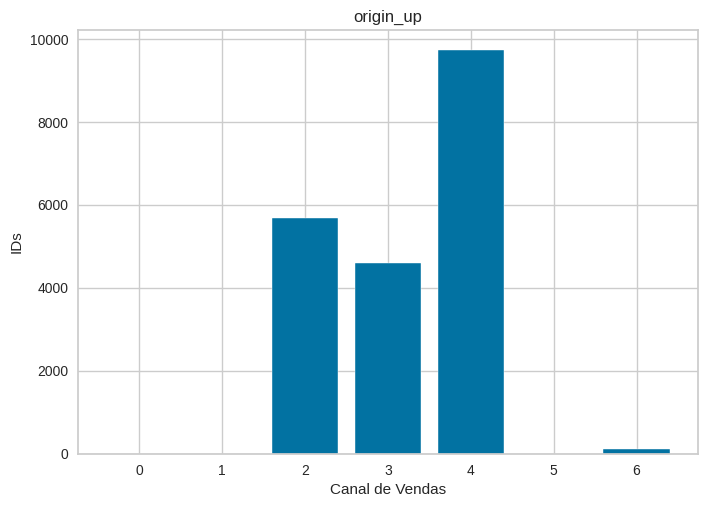

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (origin_up).
grouped_data = data_costumers['origin_up'].value_counts()
grouped_data = pd.Series(grouped_data)

plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Canal de Vendas')
plt.ylabel('IDs')
plt.title('origin_up')
plt.show()

### cons_12m

In [ ]:
# Column for 'Electricity consumption in the last 12 months (kWh)' - 100% complete
# Column with numerical data
data_costumers['cons_12m'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: cons_12m
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "cons_12m" column.
data_costumers['cons_12m'].unique()

array([42132,  3537,  6543, ..., 18163, 87146, 32270])

In [ ]:
# Column descriptive statistics
data_costumers['cons_12m'].describe()

count    2.012000e+04
mean     1.949648e+05
std      6.754792e+05
min     -1.252760e+05
25%      5.832750e+03
50%      1.533450e+04
75%      5.035500e+04
max      1.609711e+07
Name: cons_12m, dtype: float64

### cons_gas_12m   

In [ ]:
# Column 'Gas consumption in the last 12 months (kWh)' - 100% complete
# Column with numerical data
data_costumers['cons_gas_12m'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: cons_gas_12m
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "cons_12m" column.
data_costumers['cons_12m'].unique()

array([42132,  3537,  6543, ..., 18163, 87146, 32270])

In [ ]:
# Column - descriptive statistics
data_costumers['cons_12m'].describe()

count    2.012000e+04
mean     1.949648e+05
std      6.754792e+05
min     -1.252760e+05
25%      5.832750e+03
50%      1.533450e+04
75%      5.035500e+04
max      1.609711e+07
Name: cons_12m, dtype: float64

### cons_last_month

In [ ]:
# Column for 'last month's electricity consumption (kWh)' - 100% filled
# Column with numerical data
data_costumers['cons_last_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: cons_last_month
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "cons_last_month" column.
data_costumers['cons_last_month'].unique()

array([  3215,    563,    399, ..., 154171,  21409,  11367])

In [ ]:
# Column descriptive statistics
data_costumers['cons_last_month'].describe()

count    2.012000e+04
mean     1.953380e+04
std      8.087283e+04
min     -9.138600e+04
25%      0.000000e+00
50%      9.060000e+02
75%      4.119500e+03
max      4.538720e+06
Name: cons_last_month, dtype: float64

### forecast_price_pow_p1

In [ ]:
# Column 'forecast energy price for the 1st period ($)' - 99.2% complete
# Column with numerical data
data_costumers['forecast_price_pow_p1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: forecast_price_pow_p1
Non-Null Count  Dtype  
--------------  -----  
19970 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "forecast_price_pow_p1" column.
data_costumers['forecast_price_pow_p1'].unique()

array([40.606701  , 44.44470996, 44.31137796, 47.80087836, 59.17346796,
       45.30837756, 46.30537836, 46.31137836, 58.99595196, 41.1052014 ,
       40.9390266 , 45.80687796, 41.2713642 , 40.728885  , 59.26637796,
               nan, 45.31137756, 46.70417796, 45.81137796, 47.30237796,
        0.        , 46.80387756, 46.80687756, 37.929294  , 41.4375258 ,
       46.30687836, 41.603697  , 44.80987836, 53.28437796, 47.80687836,
       41.7698634 , 46.55462196, 41.7288846 , 41.2733682 , 41.6037006 ,
       47.30687796, 42.69342996, 39.02200704, -0.122184  , 35.55576792,
       45.94470996, 44.30687796, 59.05128396, 41.2718682 , 32.583108  ,
       41.1067014 , 41.404305  , 41.3955522 , 59.44470996])

In [ ]:
# Column descriptive statistics
data_costumers['forecast_price_pow_p1'].describe()

count    19970.000000
mean        43.543557
std          5.173667
min         -0.122184
25%         40.606701
50%         44.311378
75%         44.311378
max         59.444710
Name: forecast_price_pow_p1, dtype: float64

In [ ]:
# Column descriptive statistics
data_costumers['forecast_price_pow_p1'].isnull().value_counts()

False    19970
True       150
Name: forecast_price_pow_p1, dtype: int64

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'forecast_price_pow_p1' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['forecast_price_pow_p1', 'net_margin'])
df_to_fill = data_costumers[data_costumers['forecast_price_pow_p1'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['forecast_price_pow_p1']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'forecast_price_pow_p1' values with the predicted values.
data_costumers['forecast_price_pow_p1'] = data_costumers['forecast_price_pow_p1'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

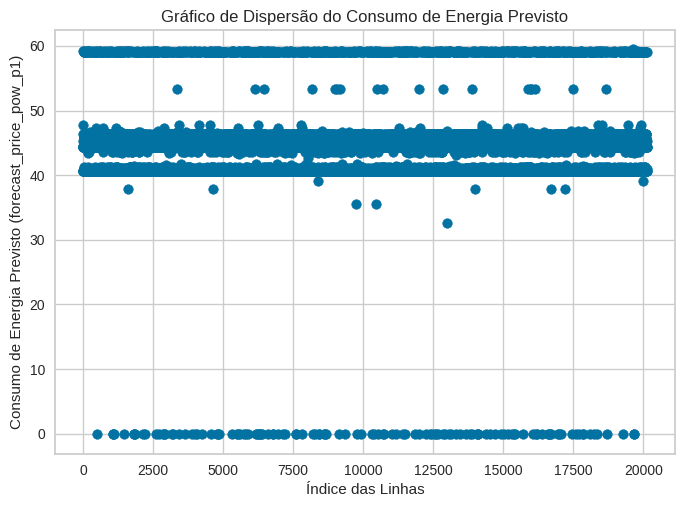

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (forecast_price_pow_p1).
filtered_data = data_costumers['forecast_price_pow_p1']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (forecast_price_pow_p1)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

### imp_cons

In [ ]:
# Column 'current consumption paid (kWh)' - 100% filled
# Column with numerical data
data_costumers['imp_cons'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: imp_cons
Non-Null Count  Dtype  
--------------  -----  
20120 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Filling the missing 'imp_cons' values with the predicted values.
data_costumers['imp_cons'].unique()

array([ 296.9 ,   80.66,   37.91, ...,  429.  , 1758.56,   46.98])

In [ ]:
# Column descriptive statistics
data_costumers['imp_cons'].describe()

count    20120.000000
mean       196.822941
std        498.026444
min      -9038.210000
25%          0.000000
50%         44.820000
75%        220.850000
max      18267.500000
Name: imp_cons, dtype: float64

In [ ]:
# Column descriptive statistics
data_costumers['imp_cons'].isnull().value_counts()

False    20120
Name: imp_cons, dtype: int64

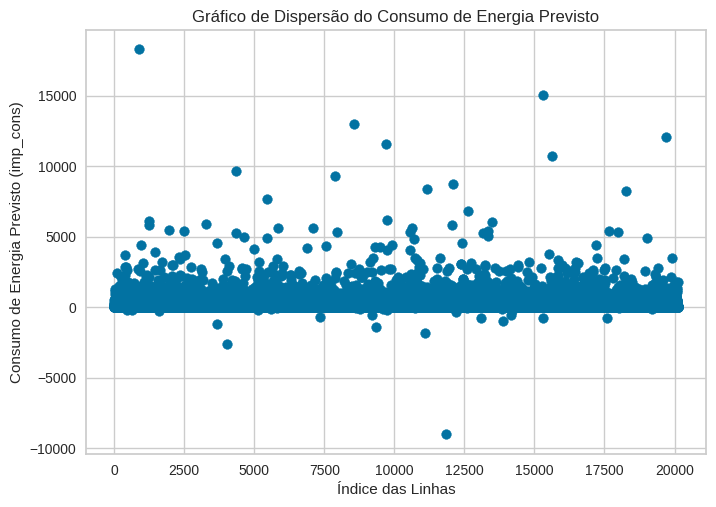

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (imp_cons).
filtered_data = data_costumers['imp_cons']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (imp_cons)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

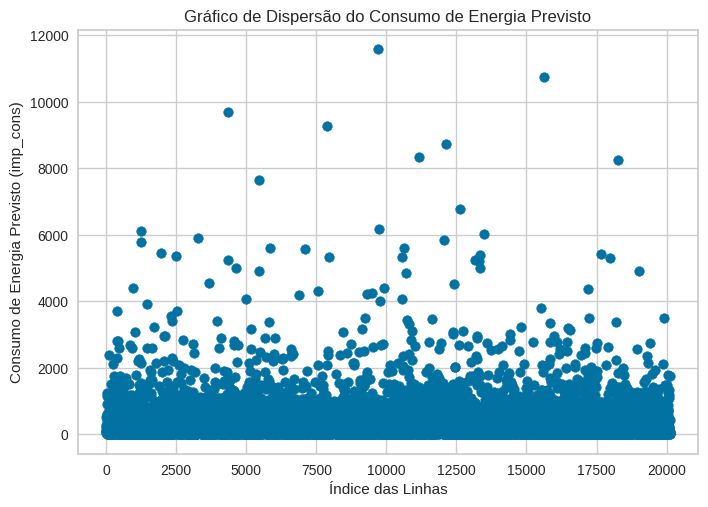

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (imp_cons) within a specific range.
filtered_data = data_costumers[(data_costumers['imp_cons'] < 12000) & (data_costumers['imp_cons'] > 0)]

plt.scatter(filtered_data.index, filtered_data['imp_cons'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (imp_cons)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'imp_cons' is between 0 and 12000.
filter_condition = (data_costumers['imp_cons'] < 12000) & (data_costumers['imp_cons'] > 0)

average_imp_cons = data_costumers['imp_cons'].mean()

data_costumers.loc[~filter_condition, 'imp_cons'] = average_imp_cons

### margin_gross_pow_ele

In [ ]:
# Column of 'gross margin on energy subscription ($)' - 100% fill
# Column with numerical data
data_costumers['imp_cons'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: imp_cons
Non-Null Count  Dtype  
--------------  -----  
20120 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "imp_cons" column.
data_costumers['imp_cons'].unique()

array([ 296.9 ,   80.66,   37.91, ...,  429.  , 1758.56,   46.98])

In [ ]:
# Column descriptive statistics
data_costumers['imp_cons'].describe()

count    20120.000000
mean       275.591007
std        422.131262
min          0.060000
25%        137.397500
50%        196.822941
75%        220.720000
max      11577.590000
Name: imp_cons, dtype: float64

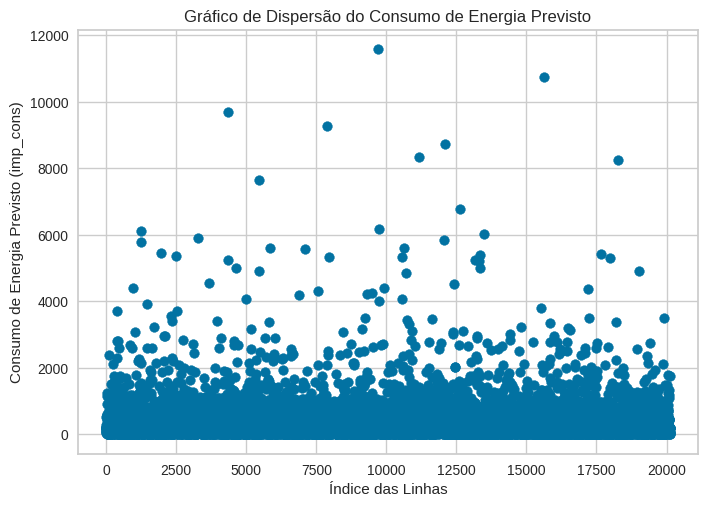

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (imp_cons).
filtered_data = data_costumers['imp_cons']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (imp_cons)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

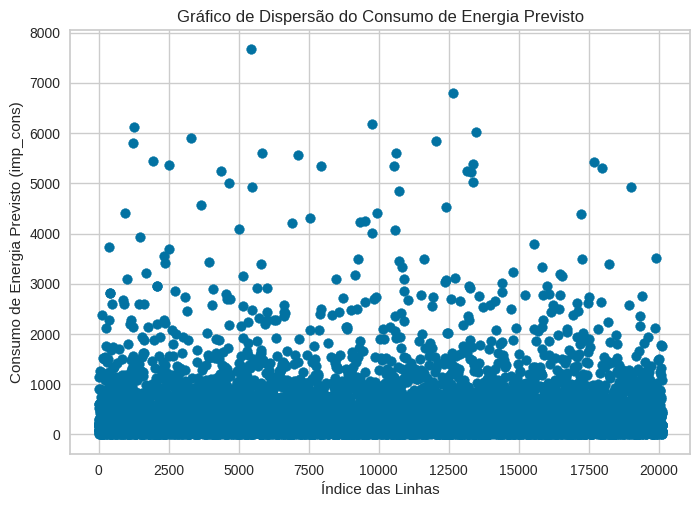

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (imp_cons) within a specific range.
filtered_data = data_costumers[(data_costumers['imp_cons'] < 8000) & (data_costumers['imp_cons'] > 0)]

plt.scatter(filtered_data.index, filtered_data['imp_cons'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (imp_cons)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'imp_cons' is between 0 and 8000.
filter_condition = (data_costumers['imp_cons'] < 8000) & (data_costumers['imp_cons'] > 0)

average_imp_cons = data_costumers['imp_cons'].mean()

data_costumers.loc[~filter_condition, 'imp_cons'] = average_imp_cons

### net_margin

In [ ]:
# 'total net margin ($)' column - 99.9% fill
# Column with numerical data
data_costumers['net_margin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: net_margin
Non-Null Count  Dtype  
--------------  -----  
20102 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "net_margin" column.
data_costumers['net_margin'].unique()

array([488.25,  29.18,  74.59, ..., 254.81, 381.77,  20.38])

In [ ]:
# Column descriptive statistics
data_costumers['net_margin'].describe()

count    20102.000000
mean       217.304279
std        356.223220
min      -4148.990000
25%         51.542500
50%        119.425000
75%        276.965000
max      24570.650000
Name: net_margin, dtype: float64

In [ ]:
# Checking the distribution of missing values in the 'net_margin' column.
data_costumers['net_margin'].isnull().value_counts()

False    20102
True        18
Name: net_margin, dtype: int64

In [ ]:
# Filling the distribution of missing values with zeros
data_costumers['net_margin'] = data_costumers['net_margin'].fillna(0)

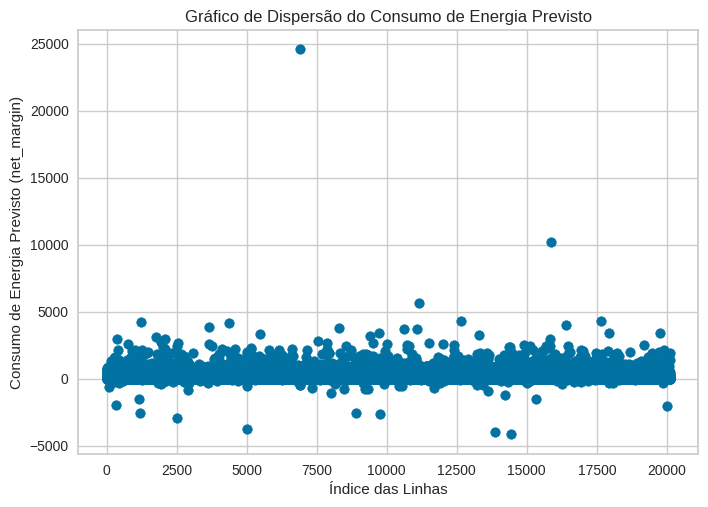

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (net_margin).
filtered_data = data_costumers['net_margin']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (net_margin)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

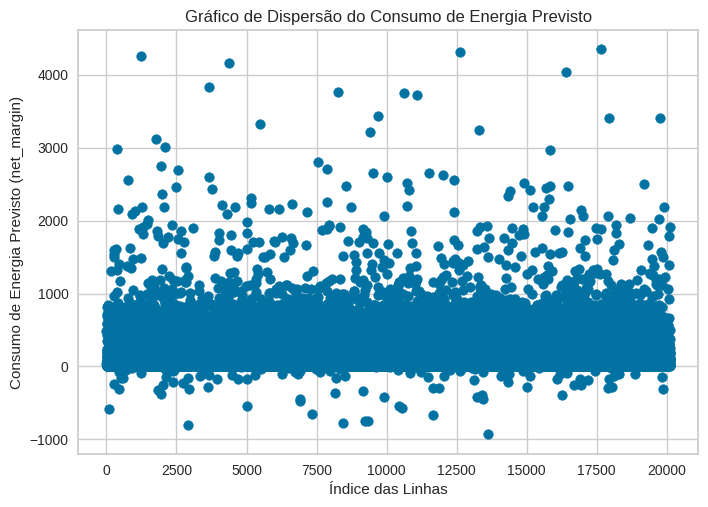

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (net_margin) within a specific range.
filtered_data = data_costumers[(data_costumers['net_margin'] < 5000) & (data_costumers['net_margin'] > -1000)]

plt.scatter(filtered_data.index, filtered_data['net_margin'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (net_margin)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'net_margin' is between -1000 and 5000.
filter_condition = (data_costumers['net_margin'] < 5000) & (data_costumers['net_margin'] > -1000)

average_net_margin = data_costumers['net_margin'].mean()

data_costumers.loc[~filter_condition, 'net_margin'] = average_net_margin

### num_years_antig    

In [ ]:
# Column of 'how many years the customer has been with the company' - 100% complete
# Column with numerical data
data_costumers['num_years_antig'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: num_years_antig
Non-Null Count  Dtype
--------------  -----
20120 non-null  int64
dtypes: int64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "num_years_antig" column.
data_costumers['num_years_antig'].unique()

array([ 4,  5,  3,  6,  7, 11,  8,  2, 10,  9, 13, 12, 16, 15,  1])

In [ ]:
# Column descriptive statistics
data_costumers['num_years_antig'].describe()

count    20120.000000
mean         5.023658
std          1.678148
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         16.000000
Name: num_years_antig, dtype: float64

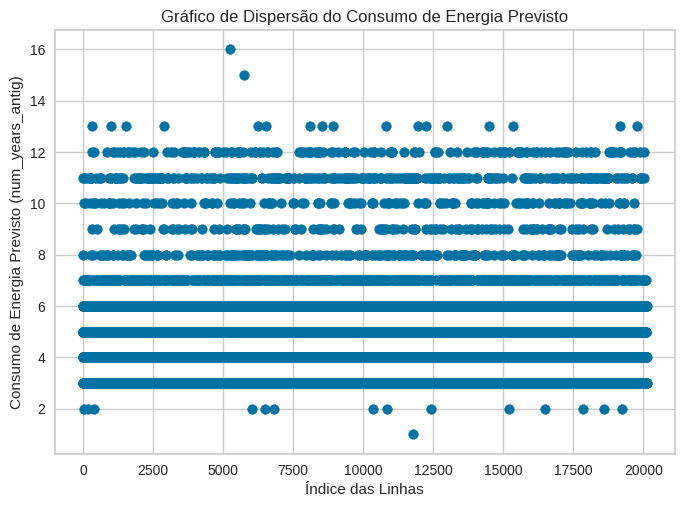

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (num_years_antig).
filtered_data = data_costumers['num_years_antig']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (num_years_antig)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

### pow_max

In [ ]:
# 'Subscribed power (kWh)' column - 99.9% filled
# Column with numerical data
data_costumers['pow_max'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20120 entries, 0 to 20119
Series name: pow_max
Non-Null Count  Dtype  
--------------  -----  
20116 non-null  float64
dtypes: float64(1)
memory usage: 157.3 KB


In [ ]:
# Examining the unique values in the "pow_max" column.
data_costumers['pow_max'].unique()

array([ 20.   ,  15.   ,  17.321,  11.951,  13.15 ,  10.392,  19.8  ,
        17.25 ,  41.5  ,  16.5  ,  13.8  ,  13.856,  10.39 ,  49.   ,
        23.1  ,  13.2  ,  25.   ,  39.6  ,  15.935, 209.61 ,  15.001,
        26.3  ,  11.   ,  11.5  ,  63.3  ,  60.   ,  24.15 ,  17.7  ,
        27.   ,  13.85 ,  14.5  ,  33.   ,  98.1  ,  17.32 ,  12.5  ,
        15.78 ,  13.   ,  10.35 , 320.   ,  10.5  ,  70.   ,  15.01 ,
        55.   ,  22.   ,  20.02 ,  12.   ,  23.01 ,  53.   ,  11.42 ,
        21.146,  20.785,   5.   ,  19.   ,  20.7  ,  13.164,  18.41 ,
        99.   ,  17.13 ,  14.8  ,  27.6  ,  11.4  ,   9.9  ,  53.2  ,
        38.   ,  24.   ,  34.   , 100.   ,  26.4  ,  78.   ,  62.1  ,
        23.81 ,  19.7  ,  24.24 ,  45.   ,  31.   ,  38.5  , 270.   ,
        40.   ,  20.01 ,  15.22 ,  50.   ,  63.53 ,  15.29 ,  95.   ,
        16.   ,  19.745,  29.7  , 206.   ,  19.2  ,  14.49 ,  15.24 ,
        10.3  ,  18.19 ,  31.05 ,  34.641,  30.   ,  37.   ,  16.454,
        15.4  , 235.

In [ ]:
# Column descriptive statistics
data_costumers['pow_max'].describe()

count    20116.000000
mean        20.578284
std         21.833836
min          0.000000
25%         12.500000
50%         13.856000
75%         19.800000
max        500.000000
Name: pow_max, dtype: float64

In [ ]:
# Column descriptive statistics
data_costumers['pow_max'].isnull().value_counts()

False    20116
True         4
Name: pow_max, dtype: int64

In [ ]:
# Creating a training dataset by dropping rows with missing values in 'pow_max' and 'net_margin' columns.
df_train = data_costumers.dropna(subset=['pow_max', 'net_margin'])
df_to_fill = data_costumers[data_costumers['pow_max'].isnull()]

X_train = df_train[['net_margin']]
y_train = df_train['pow_max']

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

X_to_fill = df_to_fill[['net_margin']]
X_to_fill = sm.add_constant(X_to_fill)
predicted_values = results.predict(X_to_fill)

# Filling the missing 'pow_max' values with the predicted values.
data_costumers['pow_max'] = data_costumers['pow_max'].fillna(pd.Series(predicted_values, index=df_to_fill.index))

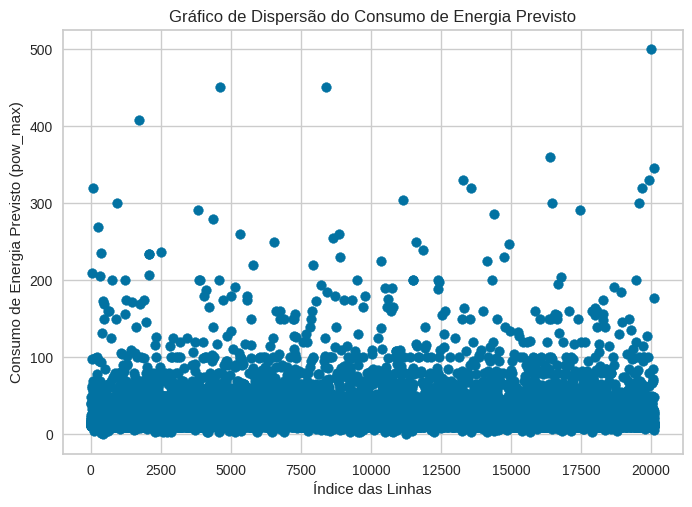

In [ ]:
# Creating a scatter plot to visualize the predicted energy consumption data (pow_max).
filtered_data = data_costumers['pow_max']

plt.scatter(filtered_data.index, filtered_data.values)
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (pow_max)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

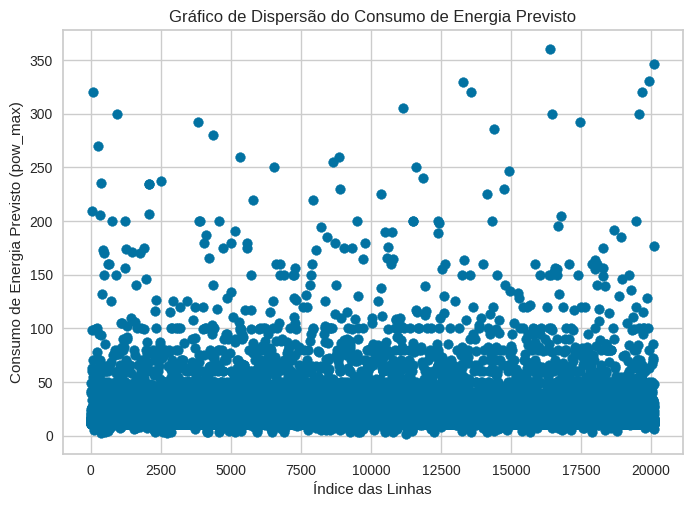

In [ ]:
# Creating a scatter plot to visualize predicted energy consumption data (pow_max) within a specific range.
filtered_data = data_costumers[(data_costumers['pow_max'] < 400) & (data_costumers['pow_max'] > 0)]

plt.scatter(filtered_data.index, filtered_data['pow_max'])
plt.xlabel('Índice das Linhas')
plt.ylabel('Consumo de Energia Previsto (pow_max)')
plt.title('Gráfico de Dispersão do Consumo de Energia Previsto')
plt.show()

In [ ]:
# Defining a filter condition to identify rows where 'pow_max' is between 0 and 7000.
filter_condition = (data_costumers['pow_max'] < 400) & (data_costumers['pow_max'] > 0)

average_pow_max = data_costumers['pow_max'].mean()

data_costumers.loc[~filter_condition, 'pow_max'] = average_pow_max